In [0]:
from google.colab import drive

In [0]:
location = //dataset repository link goes here
!ls "/content/gdrive/My Drive/colab/resized_data_set"

test  train


In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

from __future__ import print_function

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import model_to_dot
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout

Using TensorFlow backend.


# New Section

In [0]:
model = Sequential()
 
model.add(Conv2D(activation ='relu', input_shape = (32,32,3), filters=32, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
 
model.add(Conv2D(activation ='relu',filters=32, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
model.add(Conv2D(activation ='relu', filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
# model.add(Dropout(0.25))
model.add(BatchNormalization())
 
model.add(Conv2D(activation ='relu',filters=128, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 5, activation='softmax'))




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [0]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [0]:
train_generator = train_datagen.flow_from_directory(
                                                    location+'/train/',
                                                    target_size=(32, 32),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                    location+'/test',
                                                    target_size=(32, 32),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')


Found 1500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
{'beguni': 0, 'piyaju': 1, 'puri': 2, 'singara': 3, 'somosa': 4}


In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)


In [0]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=1500 /30,
                    epochs=75,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
50/50 [==============================] - 597s 12s/step - loss: 1.4436 - acc: 0.4660 - val_loss: 0.9712 - val_acc: 0.6588
Epoch 2/75
50/50 [==============================] - 6s 113ms/step - loss: 0.8233 - acc: 0.7133 - val_loss: 0.8831 - val_acc: 0.6483
Epoch 3/75
50/50 [==============================] - 6s 111ms/step - loss: 0.7328 - acc: 0.7333 - val_loss: 1.4138 - val_acc: 0.4973
Epoch 4/75
50/50 [==============================] - 6s 113ms/step - loss: 0.6933 - acc: 0.7593 - val_loss: 0.6550 - val_acc: 0.7551
Epoch 5/75
50/50 [==============================] - 6s 112ms/step - loss: 0.5906 - acc: 0.8093 - val_loss: 1.2409 - val_acc: 0.5190
Epoch 6/75
50/50 [==============================] - 6s 112ms/step - loss: 0.5953 - acc: 0.7953 - val_loss: 0.4442 - val_acc: 0.8354
Epoch 7/75
50/50 [==============================] - 6s 113ms/step - loss: 0.5589 - acc: 0.8140 - val_loss: 0.7629 - val_acc: 0.7041
Epoch 8/75
50/50 [==========

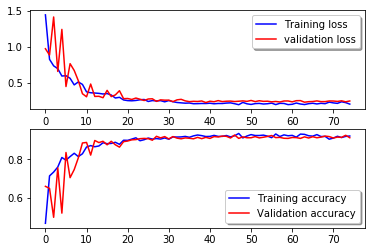

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
model.save

<bound method Network.save of <keras.engine.sequential.Sequential object at 0x7f789f0fde80>>

[[1. 0. 0. 0. 0.]]
{'beguni': 0, 'piyaju': 1, 'puri': 2, 'singara': 3, 'somosa': 4}


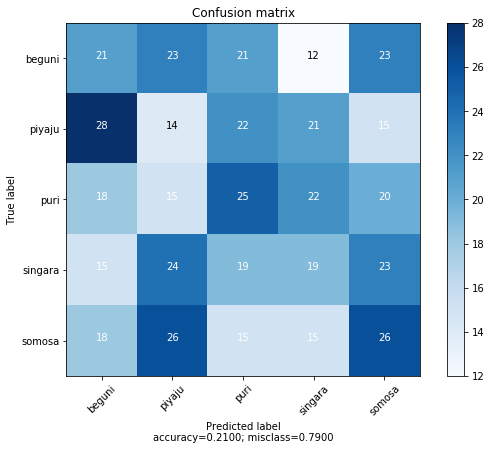

In [0]:
#import numpy as np
#from keras.preprocessing import image
#test_image = image.load_img("/content/gdrive/My Drive/colab/chop.jpg",target_size=(32, 32))
#test_image = image.img_to_array(test_image)
#test_image = np.expand_dims(test_image,axis=0)
#result = model.predict(test_image)
#train_generator.class_indices
#print(result)


from keras.preprocessing import image

test = image.load_img('/content/gdrive/My Drive/colab/resized_data_set/test/puri/puri.jpg',target_size=(32, 32))
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)

print(model.predict(test))
print(train_generator.class_indices)

Y_pred = model.predict_generator(validation_generator, 500/30)
y_pred = np.argmax(Y_pred, axis=1)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
target_names = train_generator.class_indices




plot_confusion_matrix(cm,target_names)

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
  
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()